

#  run 6341 Compare Energy resolution with and without Q-corrections



In [1]:
import time
print("Last updated on ", time.asctime())

Last updated on  Tue Nov 27 10:57:32 2018


## Imports

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
import os
import time
import datetime

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.dates  as md
import collections       as collections
import pandas            as pd

from   scipy import optimize
import invisible_cities.core.fit_functions as fitf
from  invisible_cities.core .core_functions import in_range

import krcal.utils.plt_functions          as krplot
import krcal.utils.hst_extend_functions   as hst

import csth.utils.cepeak_plot             as cpkplot
import csth.utils.fits                    as cfit

In [4]:
# Plotting style
default_cmap = "jet"
figure_size  = 14, 8
font_size    = 14

plt.rcParams["figure.figsize"] =   figure_size
plt.rcParams[  "font.size"   ] =   font_size

## Input files

In [5]:
run_number = 6341
trigger    = 'trigger2'
tags = ['', '_noq']
input_filenames = [f"$IC_DATA/{run_number}/cepks/cepks_{run_number}_0000_11999_6q0min{tag}.h5" for tag in tags]
input_files     = [os.path.expandvars(ifile) for ifile in input_filenames]

In [6]:
def esum_from_hdf(filename, clear = True):
    print(filename)
    h = pd.HDFStore(filename)
    esum = h['esum']
    print('total events :', len(esum))
    esum.dropna()
    sel_base = (esum.nslices > 0) & (esum.nhits > 0) & (esum.zmax < 650.) & (esum.s1e >0)
    esum = esum[sel_base]
    print('clean events :', len(esum) )
    #esum0 = esum[sel_base]
    #h.close()
    return esum

In [7]:
esums = [esum_from_hdf(ifile) for ifile in input_files]

/Users/hernando/investigacion/NEXT/data/runIV//6341/cepks/cepks_6341_0000_11999_6q0min.h5
total events : 203104
clean events : 198732
/Users/hernando/investigacion/NEXT/data/runIV//6341/cepks/cepks_6341_0000_11999_6q0min_noq.h5
total events : 203104
clean events : 198732


In [8]:
#cpkplot.df(esum)
tags = ['q', 'noq']

In [9]:
Ea = hst.Vaxis((0., 700e3), 500)
def canvas_e(esums, i0 = 0):
    alpha = 1./len(esums)
    #c = hst.Canvas(1, 1)
    for i, esum in enumerate(esums):
        plt.hist(esum.e, Ea.bins, alpha = alpha, label= tags[i0+i]) 
        plt.xlabel('E (pes)')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()

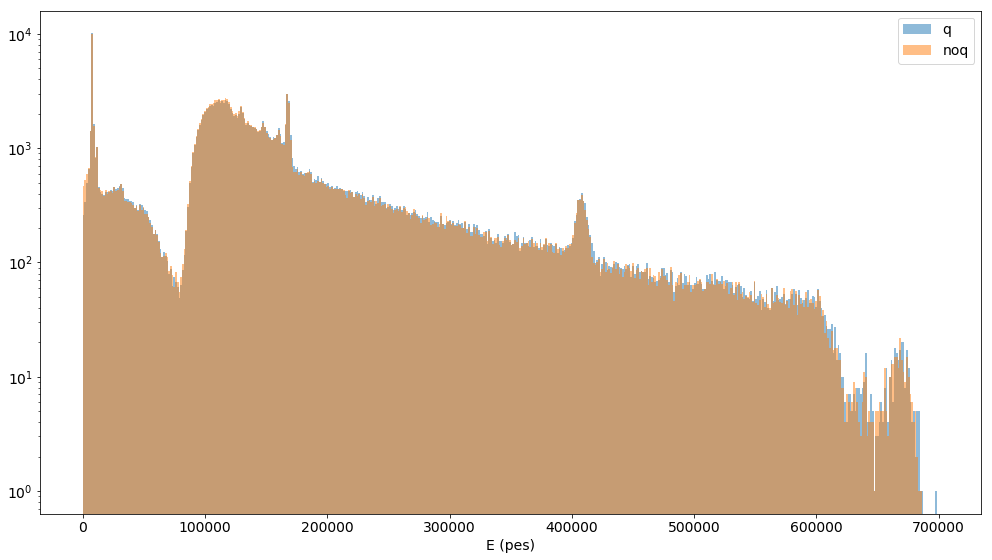

In [10]:
canvas_e(esums)

In [11]:
Exra = hst.Vaxis((  5e3,  10e3), 100)
Ecsa = hst.Vaxis((110e3, 190e3), 100)
Edsa = hst.Vaxis((350e3, 450e3), 100)
Etha = hst.Vaxis((500e3, 700e3), 100)
def canvas_eregions(esums, i0 = 0):
    alpha = 1./len(esums)
    c = hst.Canvas(2, 2)
    for i, esum in enumerate(esums):
        hst.hist(esum.e, Exra.bins, alpha = alpha, stats = None, canvas = c(1), label = tags[i + i0], xylabels=('E (pes)',''))
        hst.hist(esum.e, Ecsa.bins, alpha = alpha, stats = None, canvas = c(2), label = tags[i + i0], xylabels=('E (pes)',''))
        hst.hist(esum.e, Edsa.bins, alpha = alpha, stats = None, canvas = c(3), label = tags[i + i0], xylabels=('E (pes)',''))
        hst.hist(esum.e, Etha.bins, alpha = alpha, stats = None, canvas = c(4), label = tags[i + i0], xylabels=('E (pes)',''))
    plt.legend()
    plt.tight_layout()

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


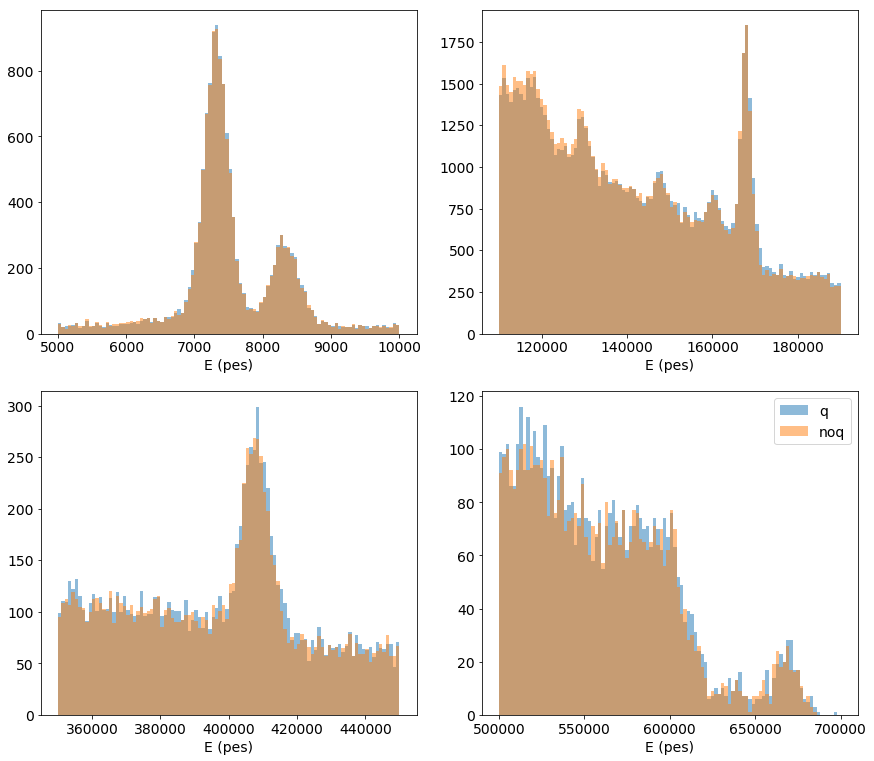

In [12]:
canvas_eregions(esums)

In [14]:
qax = hst.Vaxis((0., 80e3), 500)
def canvas_q(esums, qax):
    alpha = 1./len(esums)
    #c = hst.Canvas(1, 1)
    for i, esum in enumerate(esums):
        plt.hist(esum.q, qax.bins, alpha = alpha, label= tags[i]) 
        plt.xlabel('Q (pes)')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()

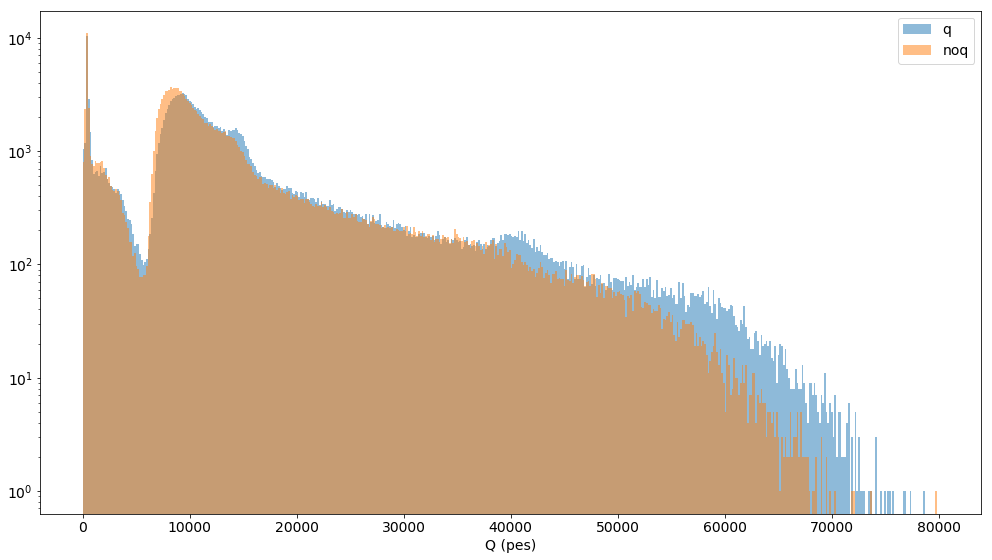

In [15]:
canvas_q(esums, qax)

## E- resolution in different E-ranges

$\mu$ : 8334.5	 $\sigma$ : 194.2	 FWHM : 5.47
$\mu$ : 7323.1	 $\sigma$ : 176.5	 FWHM : 5.66


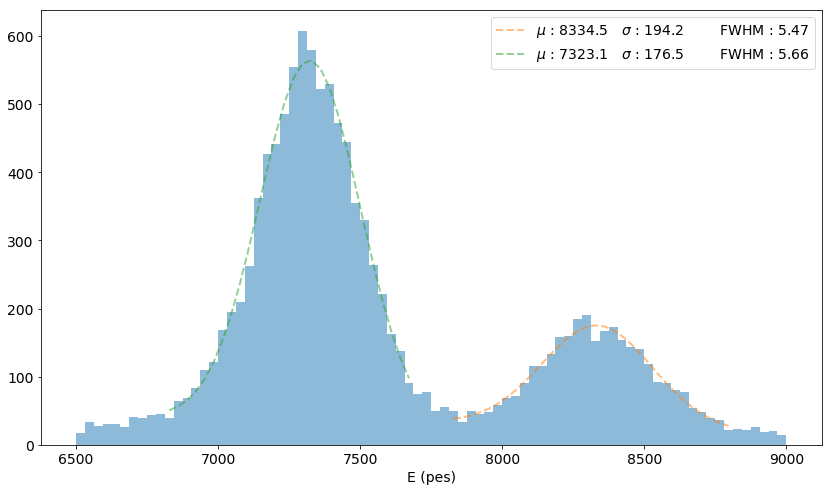

In [18]:
xrax  = hst.Vaxis( (6.5e3, 9.e3), 80)
peaks = ((7.8e3, 8.8e3), (6.8e3, 7.7e3) )
cfit.plot_fit_multiple_peaks(esums[0].e, xrax.range, xrax.nbins, peaks)

$\mu$ : 8333.6	 $\sigma$ : 194.3	 FWHM : 5.48
$\mu$ : 7320.9	 $\sigma$ : 175.5	 FWHM : 5.63


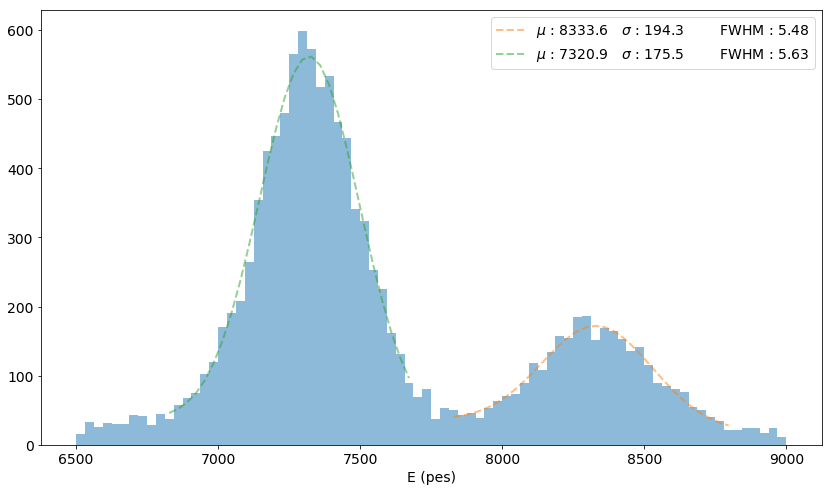

In [19]:
xrax  = hst.Vaxis( (6.5e3, 9.e3), 80)
peaks = ((7.8e3, 8.8e3), (6.8e3, 7.7e3) )
cfit.plot_fit_multiple_peaks(esums[1].e, xrax.range, xrax.nbins, peaks)

$\mu$ : 167871.9	 $\sigma$ : 1161.5	 FWHM : 1.63
$\mu$ : 147794.1	 $\sigma$ : 1128.4	 FWHM : 1.79
$\mu$ : 160528.8	 $\sigma$ : 1670.8	 FWHM : 2.45
$\mu$ : 129735.0	 $\sigma$ : 1160.7	 FWHM : 2.1


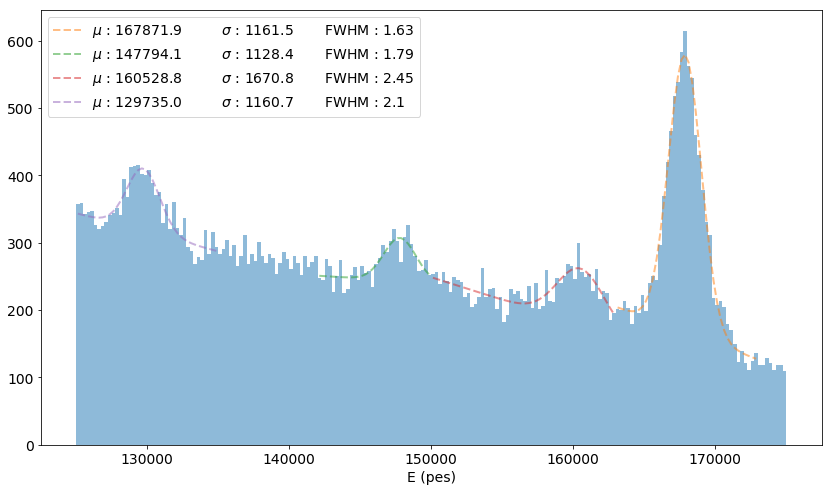

In [27]:
csax  = hst.Vaxis((125.e3, 175e3), 200)
Erpks = ( (163.e3, 173.e3), (142.e3, 150e3), (150.e3, 163.e3), (125.e3, 135e3) )
#Erpks = ( (125.e3, 135e3), )
cfit.plot_fit_multiple_peaks(esums[0].e, csax.range, csax.nbins, Erpks)

$\mu$ : 167779.4	 $\sigma$ : 1169.0	 FWHM : 1.64
$\mu$ : 147965.5	 $\sigma$ : 1546.3	 FWHM : 2.46
$\mu$ : 160393.9	 $\sigma$ : 1505.9	 FWHM : 2.21
$\mu$ : 129578.0	 $\sigma$ : 1102.5	 FWHM : 2.0


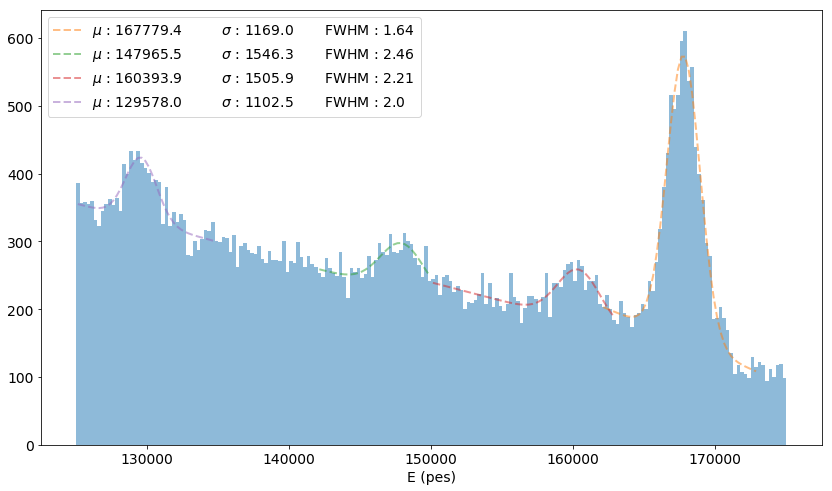

In [31]:
csax  = hst.Vaxis((125.e3, 175e3), 200)
Erpks = ( (162.e3, 173.e3), (142.e3, 150e3), (150.e3, 163.e3), (125.e3, 135e3) )
#Erpks = ( (125.e3, 135e3), )
cfit.plot_fit_multiple_peaks(esums[1].e, csax.range, csax.nbins, Erpks)

$\mu$ : 408192.4	 $\sigma$ : 4070.0	 FWHM : 2.34


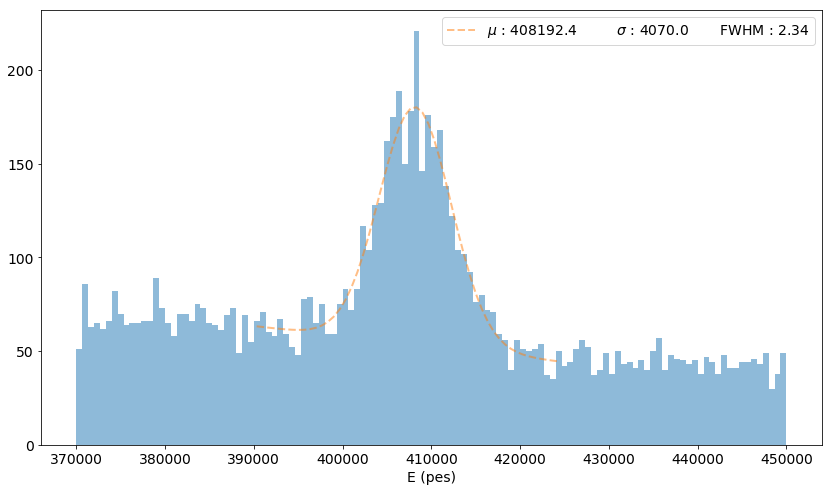

In [33]:
dsax = hst.Vaxis((370e3, 450e3), 120)
peaks = ( (390e3, 425e3), )
cfit.plot_fit_multiple_peaks(esums[0].e, dsax.range, dsax.nbins, peaks)

$\mu$ : 407792.9	 $\sigma$ : 3852.8	 FWHM : 2.22


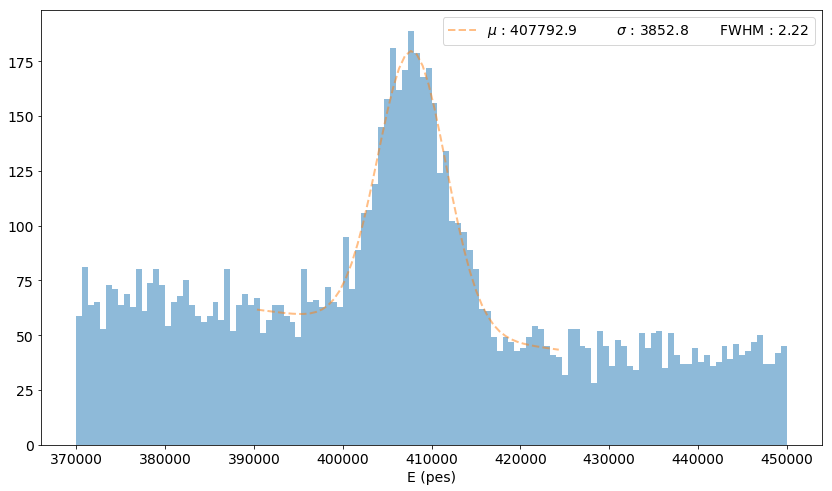

In [34]:
dsax = hst.Vaxis((370e3, 450e3), 120)
peaks = ( (390e3, 425e3), )
cfit.plot_fit_multiple_peaks(esums[1].e, dsax.range, dsax.nbins, peaks)

$\mu$ : 668139.3	 $\sigma$ : 5871.6	 FWHM : 2.07


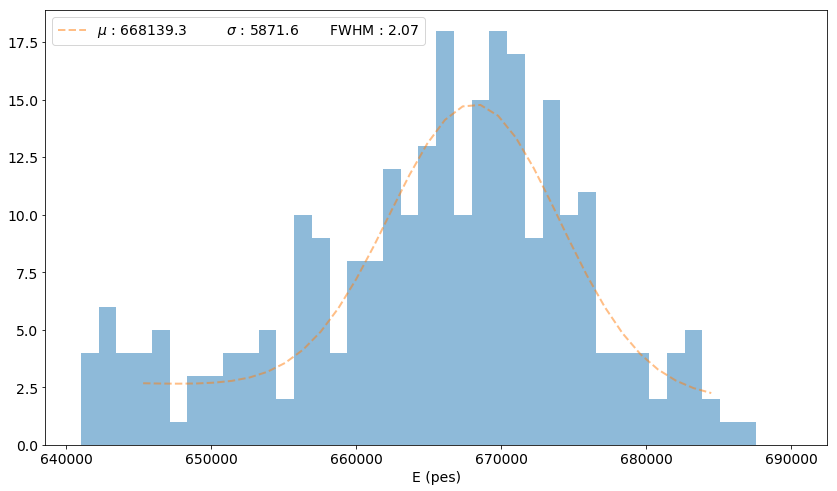

In [51]:
tlax  = hst.Vaxis( (641.e3, 690.e3), 40)
#plt.hist(esums[0].e, tlax.bins);
peaks = ( (645.e3, 685.e3), )
cfit.plot_fit_multiple_peaks(esums[0].e, tlax.range, tlax.nbins, peaks)

$\mu$ : 668434.9	 $\sigma$ : 6669.5	 FWHM : 2.34


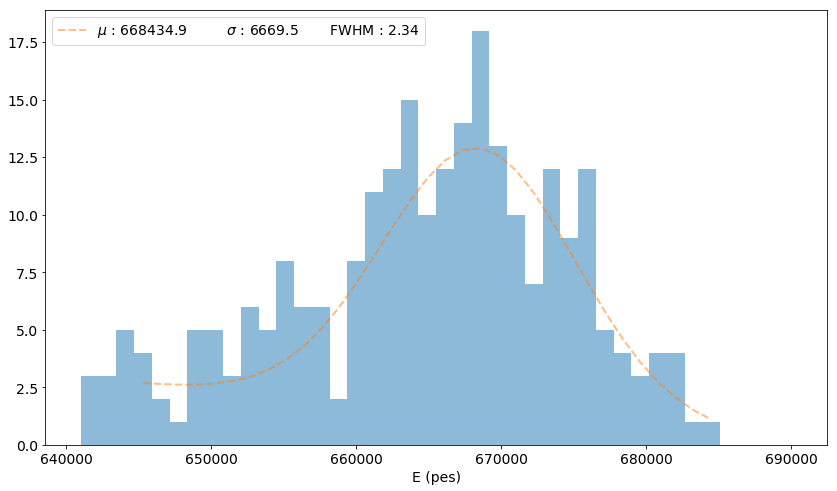

In [52]:
tlax  = hst.Vaxis( (641.e3, 690.e3), 40)
#plt.hist(esums[0].e, tlax.bins);
peaks = ( (645.e3, 685.e3), )
cfit.plot_fit_multiple_peaks(esums[1].e, tlax.range, tlax.nbins, peaks)

## Compare event per event

In [61]:
esum0, esum1 = esums
groups0 = esum0.groupby(['event', 'peak'])
groups1 = esum1.groupby(['event', 'peak'])
des = []
i = 0
for iloc, igroup0 in groups0:
    i += 1
#    if (i>10): break
    igroup1 = groups1.get_group(iloc)
    if (igroup1 is None): continue
    de = igroup0.e.values - igroup1.e.values
    des.append(de[0])

In [63]:
len(des)

198732

In [64]:
len(groups0)

198732

In [66]:
esum0['des'] = np.array(des)

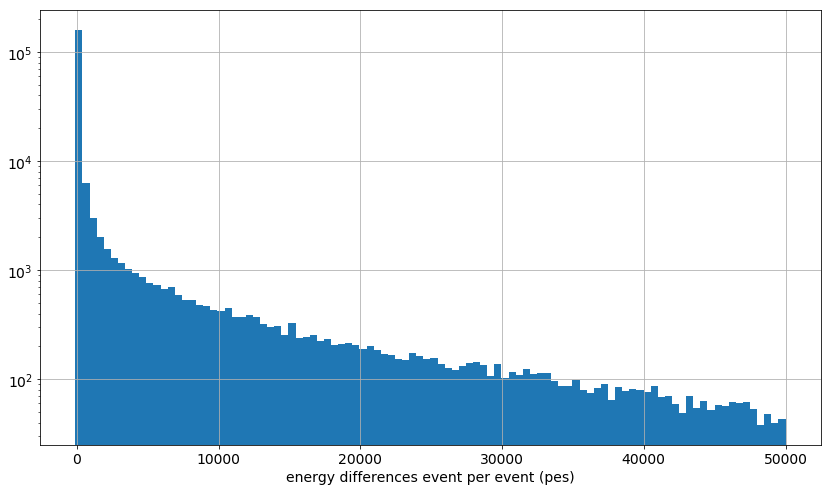

In [127]:
plt.hist(esum0.des, 100, (-100., 50e3));
plt.yscale('log')
plt.xlabel('energy differences event per event (pes)')
plt.grid()

In [121]:
xsel = abs(100.*esum0.des/esum0.e) > 2.

/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


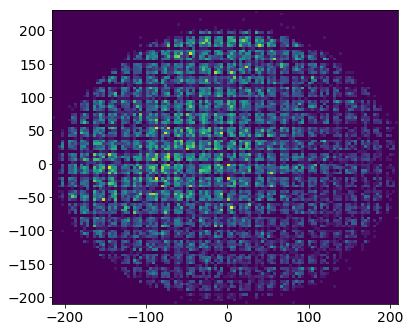

In [122]:
c = hst.Canvas(1, 1)
hst.hist2d(esum0.xu[xsel], esum0.yu[xsel], (111, 111), canvas = c(1)); # alpha = 0.1)

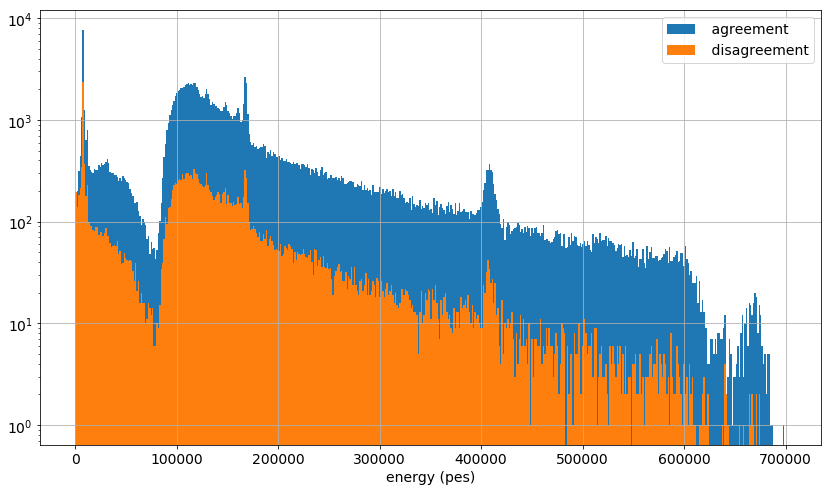

In [126]:
plt.hist(esum0.e[~xsel], 500, (0., 700e3), label = ' agreement')
plt.hist(esum0.e[xsel] , 500, (0., 700e3), label = ' disagreement');
plt.yscale('log')
plt.xlabel('energy (pes)')
plt.grid()
plt.legend();

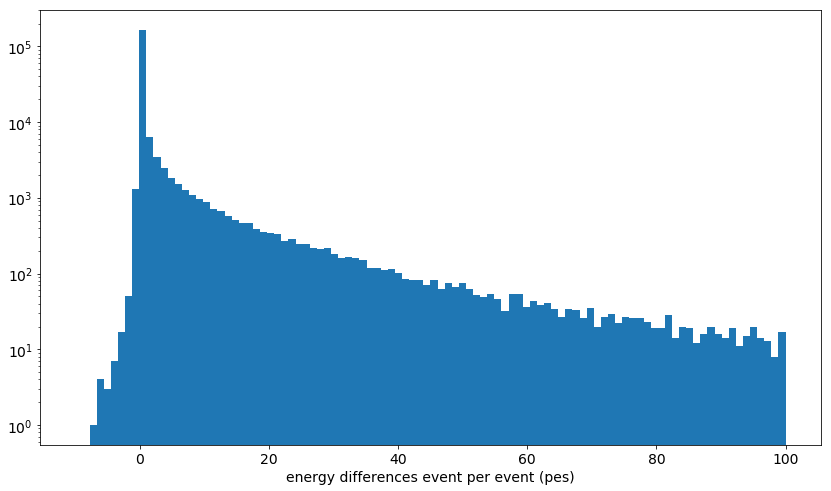

In [128]:
plt.hist(100.*esum0.des/esum0.e, 100, (-10., 100));
plt.xlabel('% energy differences event per event (pes)')
plt.yscale('log')